In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
import time
from datetime import datetime, timedelta
from sklearn import svm
import pandas as pd

import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize

files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
  
prices=list()
sentiment=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/intrinioDatasetUpdated/Sentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price['Unnamed: 0'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in price['Unnamed: 0']]
    price['Unnamed: 0'] = [row-timedelta(hours=8) for row in price['Unnamed: 0']]
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    print(sentimentVector[0:10])
    print(price[0:10])
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector=np.concatenate((sentimentVector,sentimentVector.rolling(5).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(10).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(15).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(20).mean()),axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    sentiment.append(meanvector)
    prices.append(price)

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00         0.000      0.000     0.000   
1           2  2017-08-14 14:00:00         0.000      0.000     0.000   
2           3  2017-08-14 14:15:00         0.000      0.000     1.000   
3           4  2017-08-14 14:30:00         0.000      0.000     1.000   
4           5  2017-08-14 14:45:00         0.250      0.250     1.250   
5           6  2017-08-14 15:00:00         1.125      0.625     1.125   
6           7  2017-08-14 15:15:00         1.125      1.625     3.125   
7           8  2017-08-14 15:30:00         1.125      1.625     3.125   
8           9  2017-08-14 15:45:00         1.125      1.625     4.125   
9          10  2017-08-14 16:00:00         1.125      1.625     4.125   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0        0.000          0.0         0.00         0  
1       0.0        0.000          0.0         0.00         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        1.0       5.0   
9          10  2017-08-14 16:00:00           0.0        1.0       5.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00      0.000000   0.000000  0.000000   
1           2  2017-08-14 14:00:00      0.000000   0.000000  0.000000   
2           3  2017-08-14 14:15:00      0.000000   0.000000  0.000000   
3           4  2017-08-14 14:30:00      0.000000   0.000000  0.000000   
4           5  2017-08-14 14:45:00      0.333333   0.333333  1.666667   
5           6  2017-08-14 15:00:00      0.333333   0.333333  1.666667   
6           7  2017-08-14 15:15:00      0.333333   0.333333  1.666667   
7           8  2017-08-14 15:30:00      0.333333   0.333333  1.666667   
8           9  2017-08-14 15:45:00      0.333333   0.333333  3.666667   
9          10  2017-08-14 16:00:00      0.333333   0.333333  3.666667   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0     0.000000          0.0          0.0         0  
1       0.0     0.000000          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       1.0   
2           3  2017-08-14 14:15:00           0.0        0.0       1.0   
3           4  2017-08-14 14:30:00           0.0        0.0       1.0   
4           5  2017-08-14 14:45:00           0.0        0.0       1.0   
5           6  2017-08-14 15:00:00           0.0        0.0       1.0   
6           7  2017-08-14 15:15:00           0.0        0.0       1.0   
7           8  2017-08-14 15:30:00           0.0        0.0       1.0   
8           9  2017-08-14 15:45:00           0.0        0.0       1.0   
9          10  2017-08-14 16:00:00           0.0        0.0       1.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         1  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0   0.000000       0.0   
1           2  2017-08-14 14:00:00           0.0   0.000000       0.0   
2           3  2017-08-14 14:15:00           0.0   0.000000       0.0   
3           4  2017-08-14 14:30:00           0.0   0.000000       0.0   
4           5  2017-08-14 14:45:00           0.0   0.000000       1.0   
5           6  2017-08-14 15:00:00           0.0   0.000000       1.0   
6           7  2017-08-14 15:15:00           0.0   0.000000       1.0   
7           8  2017-08-14 15:30:00           0.0   0.000000       1.0   
8           9  2017-08-14 15:45:00           0.0   0.333333       2.0   
9          10  2017-08-14 16:00:00           0.0   0.333333       2.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0  0.000000          0.0          0.0     0.000000         0  
1  0.000000          0.0          0.0     0.000000         0  
2  0.00

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        2.0       3.0   
9          10  2017-08-14 16:00:00           0.0        2.0       3.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
def expercentage(y,prediction,percentage,t):
    tot=0
    falsetotpos=0
    falsetotneg=0
    for i in range(0,len(percentage)-1):
        if(prediction[i]==1):
            tot=tot+percentage[i]
        if(prediction[i]==0):
            tot=tot-percentage[i]
            
        falsetotpos=falsetotpos+percentage[i]
        falsetotneg=falsetotneg-percentage[i]
        i=i+t
    return tot,falsetotneg, falsetotpos

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.27844712182061576
G-score: 0.400510214785544
Accuracy 0.5230088495575221
Window: 140
[[487  19]
 [520 104]]
Vol pos 3.3620044672310803
Vol neg 2.9680775175667886


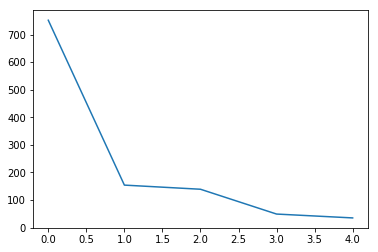

Real Percentage of gain: -11.294998324720707
Percentage of gain: 0.34261137890714105
Total gain: 387.1508581650694
000000000000000000000000000000000000000000000000
Percentile:  0
[[371   7]
 [369   6]]
0.50066401062417
Percentile:  1
[[56 12]
 [70 14]]
0.4605263157894737
Percentile:  2
[[60  0]
 [45 34]]
0.6762589928057554
Percentile:  3
[[ 0  0]
 [ 8 41]]
0.8367346938775511
Percentile:  4
[[ 0  0]
 [26  9]]
0.2571428571428571
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.11224489795918367
G-score: 0.2269037651897088
Accuracy 0.2314487632508834
Window: 140
[[207  44]
 [826  55]]
Vol pos 2.091741659867355
Vol neg 2.4446142461087828


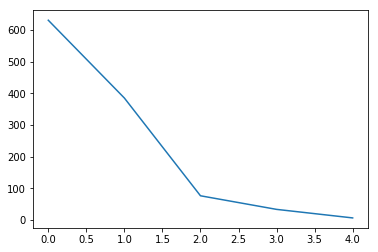

Real Percentage of gain: -253.1102495709235
Percentage of gain: -1.3946802820047648
Total gain: -1578.7780792293938
000000000000000000000000000000000000000000000000
Percentile:  0
[[191   8]
 [425   6]]
0.3126984126984127
Percentile:  1
[[ 15  21]
 [329  20]]
0.09090909090909091
Percentile:  2
[[ 1 15]
 [51  9]]
0.13157894736842105
Percentile:  3
[[ 0  0]
 [18 15]]
0.45454545454545453
Percentile:  4
[[0 0]
 [2 4]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.11764705882352941
G-score: 0.25
Accuracy 0.1935483870967742
Window: 140
[[ 91   0]
 [525  35]]
Vol pos 0.8831000300739243
Vol neg 2.3702119593932935


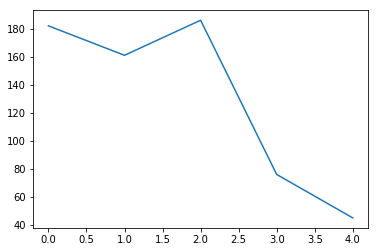

Real Percentage of gain: -108.69628514905055
Percentage of gain: -1.7405386711093158
Total gain: -1133.0906748921645
000000000000000000000000000000000000000000000000
Percentile:  0
[[72  0]
 [93 17]]
0.489010989010989
Percentile:  1
[[ 19   0]
 [138   4]]
0.14285714285714285
Percentile:  2
[[  0   0]
 [174  12]]
0.06451612903225806
Percentile:  3
[[ 0  0]
 [74  2]]
0.02631578947368421
Percentile:  4
[[ 0  0]
 [45  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.5559906029757243
G-score: 0.4903297670173415
Accuracy 0.4982300884955752
Window: 140
[[208 247]
 [320 355]]
Vol pos 3.1386647600977544
Vol neg 2.7732134524575045


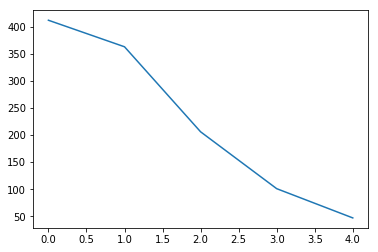

Real Percentage of gain: -40.864549701037376
Percentage of gain: 0.17226215255896526
Total gain: 194.65623239163074
000000000000000000000000000000000000000000000000
Percentile:  0
[[126 106]
 [102  77]]
0.49391727493917276
Percentile:  1
[[  9 102]
 [111 141]]
0.4132231404958678
Percentile:  2
[[68 29]
 [48 61]]
0.6262135922330098
Percentile:  3
[[ 4 10]
 [43 44]]
0.4752475247524752
Percentile:  4
[[ 0  0]
 [16 31]]
0.6595744680851063
000000000000000000000000000000000000000000000000
Working on... MSFT
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.09895833333333333
G-score: 0.22588114583160945
Accuracy 0.38761061946902653
Window: 140
[[400  19]
 [673  38]]
Vol pos 1.2920469591201558
Vol neg 1.7542744008777855


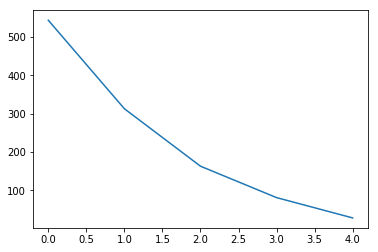

Real Percentage of gain: -53.007012813704186
Percentage of gain: -0.573487891427256
Total gain: -648.0413173127993
000000000000000000000000000000000000000000000000
Percentile:  0
[[276  16]
 [243   9]]
0.5238970588235294
Percentile:  1
[[ 71   3]
 [223  16]]
0.2779552715654952
Percentile:  2
[[ 23   0]
 [135   5]]
0.17177914110429449
Percentile:  3
[[20  0]
 [59  2]]
0.2716049382716049
Percentile:  4
[[10  0]
 [12  6]]
0.5714285714285714
000000000000000000000000000000000000000000000000
Working on... FB
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.5601851851851852
G-score: 0.562201614237507
Accuracy 0.49646643109540634
Window: 140
[[199  64]
 [506 363]]
Vol pos 3.399422196440001
Vol neg 2.760433202069552


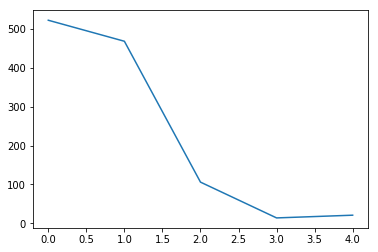

Real Percentage of gain: -63.29400881030377
Percentage of gain: 0.2977282236922578
Total gain: 337.02834921963586
000000000000000000000000000000000000000000000000
Percentile:  0
[[194  18]
 [258  52]]
0.47126436781609193
Percentile:  1
[[  4  33]
 [235 196]]
0.42735042735042733
Percentile:  2
[[ 0 13]
 [13 79]]
0.7523809523809524
Percentile:  3
[[14]]
1.0
Percentile:  4
[[21]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.04843304843304843
G-score: 0.15747483587810815
Accuracy 0.4098939929328622
Window: 140
[[447   1]
 [667  17]]
Vol pos 2.630152655982521
Vol neg 2.122150178140114


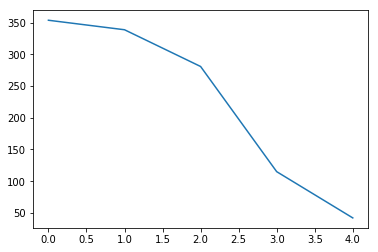

Real Percentage of gain: -100.97596475072892
Percentage of gain: -0.1742097938354298
Total gain: -197.20548662170654
000000000000000000000000000000000000000000000000
Percentile:  0
[[115   1]
 [235   3]]
0.3333333333333333
Percentile:  1
[[114   0]
 [223   5]]
0.347953216374269
Percentile:  2
[[127   0]
 [142   9]]
0.4892086330935252
Percentile:  3
[[63  0]
 [51  0]]
0.5526315789473685
Percentile:  4
[[28  0]
 [14  0]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... CSCO
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.5266159695817492
G-score: 0.5600505321818734
Accuracy 0.5573333333333333
Window: 140
[[350 127]
 [371 277]]
Vol pos 2.2929649096059257
Vol neg 1.2733474253974488


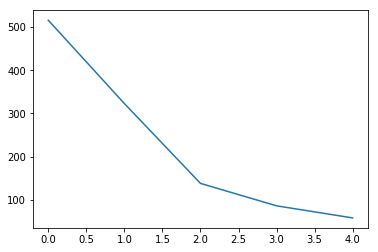

Real Percentage of gain: 29.98447126870351
Percentage of gain: 0.7142773159777653
Total gain: 803.561980474986
000000000000000000000000000000000000000000000000
Percentile:  0
[[150  70]
 [199  97]]
0.4786821705426357
Percentile:  1
[[ 50  46]
 [135  92]]
0.43962848297213625
Percentile:  2
[[40 10]
 [31 57]]
0.7028985507246377
Percentile:  3
[[57  1]
 [ 1 27]]
0.9767441860465116
Percentile:  4
[[52  0]
 [ 3  3]]
0.9482758620689655
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.6415841584158416
G-score: 0.39571181159757896
Accuracy 0.5203180212014135
Window: 140
[[103 437]
 [106 486]]
Vol pos 2.9530962748912706
Vol neg 2.7526490355541884


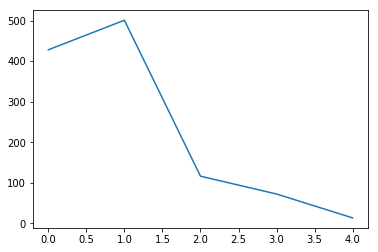

Real Percentage of gain: 180.46632149192178
Percentage of gain: 0.216153073856037
Total gain: 244.68527960503388
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 41 186]
 [ 30 171]]
0.4953271028037383
Percentile:  1
[[ 24 173]
 [ 69 235]]
0.5169660678642715
Percentile:  2
[[ 3 39]
 [ 7 67]]
0.603448275862069
Percentile:  3
[[23 37]
 [ 0 12]]
0.4861111111111111
Percentile:  4
[[11  2]
 [ 0  0]]
0.8461538461538461
000000000000000000000000000000000000000000000000
Working on... NVDA
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.5316934720908232
G-score: 0.5660082519349472
Accuracy 0.5627208480565371
Window: 140
[[356 120]
 [375 281]]
Vol pos 4.293705318817212
Vol neg 3.095515195596891


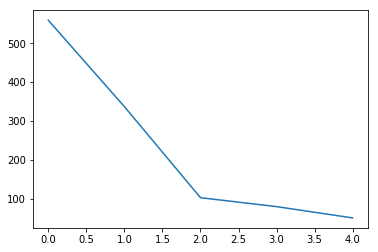

Real Percentage of gain: 83.07214007300614
Percentage of gain: 1.062553238750974
Total gain: 1202.8102662661026
000000000000000000000000000000000000000000000000
Percentile:  0
[[232  81]
 [191  55]]
0.5134168157423972
Percentile:  1
[[109   8]
 [128  92]]
0.5964391691394659
Percentile:  2
[[13 18]
 [46 26]]
0.3786407766990291
Percentile:  3
[[ 2 13]
 [ 5 60]]
0.775
Percentile:  4
[[ 0  0]
 [ 4 47]]
0.9215686274509803
000000000000000000000000000000000000000000000000
Working on... NFLX
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.15115005476451263
G-score: 0.28307357311363146
Accuracy 0.31537102473498235
Window: 140
[[288   9]
 [766  69]]
Vol pos 3.4616009513107917
Vol neg 4.739759940835373


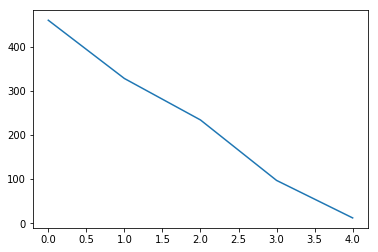

Real Percentage of gain: -335.96499452561585
Percentage of gain: -2.153288352057828
Total gain: -2437.5224145294615
000000000000000000000000000000000000000000000000
Percentile:  0
[[168   2]
 [261  29]]
0.4282608695652174
Percentile:  1
[[ 58   2]
 [237  31]]
0.27134146341463417
Percentile:  2
[[ 33   5]
 [193   2]]
0.15021459227467812
Percentile:  3
[[27  0]
 [68  2]]
0.29896907216494845
Percentile:  4
[[1 0]
 [7 4]]
0.4166666666666667
000000000000000000000000000000000000000000000000
Working on... BKNG
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.6938775510204082
G-score: 0.6157160626737479
Accuracy 0.6231155778894473
Window: 140
[[ 78  53]
 [ 97 170]]
Vol pos 1.319593987369562
Vol neg 0.9518772845561676


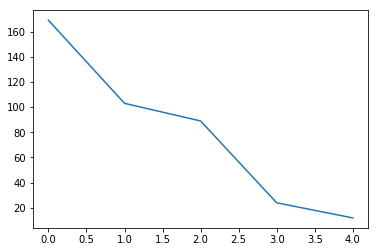

Real Percentage of gain: 110.30236282376472
Percentage of gain: 0.463511849709111
Total gain: 184.47771618422618
000000000000000000000000000000000000000000000000
Percentile:  0
[[50 47]
 [35 40]]
0.5232558139534884
Percentile:  1
[[21  5]
 [23 51]]
0.72
Percentile:  2
[[ 7  0]
 [35 47]]
0.6067415730337079
Percentile:  3
[[ 0  0]
 [ 4 19]]
0.8260869565217391
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.4469160768452982
G-score: 0.5267745333012103
Accuracy 0.5155004428697962
Window: 140
[[361  27]
 [520 221]]
Vol pos 2.8256628300781865
Vol neg 2.3669072662287496


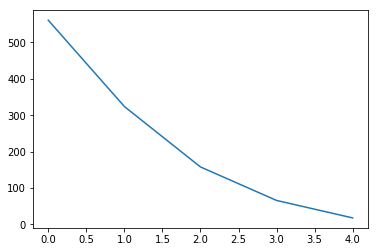

Real Percentage of gain: -143.33448542664757
Percentage of gain: 0.30986491804993677
Total gain: 349.83749247837864
000000000000000000000000000000000000000000000000
Percentile:  0
[[251  26]
 [245  39]]
0.5169340463458111
Percentile:  1
[[ 62   1]
 [186  75]]
0.4228395061728395
Percentile:  2
[[25  0]
 [79 54]]
0.5
Percentile:  3
[[23  0]
 [ 9 34]]
0.8636363636363636
Percentile:  4
[[18]]
1.0
000000000000000000000000000000000000000000000000
Working on... AMGN
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.6995336442371753
G-score: 0.5480315448011508
Accuracy 0.5983971504897596
Window: 140
[[147 173]
 [278 525]]
Vol pos 2.088624190971831
Vol neg 1.6967498874473181


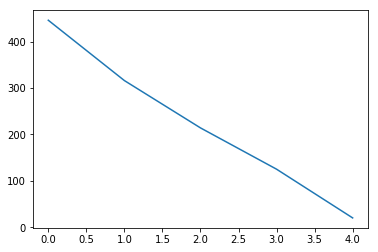

Real Percentage of gain: 170.79873835951605
Percentage of gain: 0.5684071746165004
Total gain: 638.3212570943299
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 48 117]
 [105 176]]
0.5022421524663677
Percentile:  1
[[ 32  23]
 [ 75 186]]
0.689873417721519
Percentile:  2
[[ 16  10]
 [ 78 110]]
0.5887850467289719
Percentile:  3
[[38 18]
 [19 50]]
0.704
Percentile:  4
[[12  5]
 [ 0  3]]
0.75
000000000000000000000000000000000000000000000000
Working on... TXN
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.6821345707656613
G-score: 0.6619652902325593
Accuracy 0.636604774535809
Window: 140
[[279  89]
 [322 441]]
Vol pos 2.4768587101109967
Vol neg 2.529103726718465


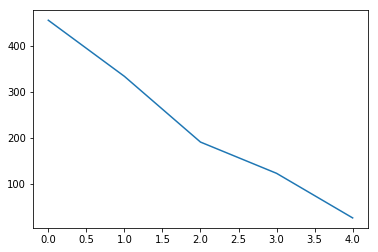

Real Percentage of gain: 99.5237850912555
Percentage of gain: 0.6577158617140836
Total gain: 743.8766395986286
000000000000000000000000000000000000000000000000
Percentile:  0
[[141  67]
 [124 123]]
0.5802197802197803
Percentile:  1
[[112  17]
 [ 45 160]]
0.8143712574850299
Percentile:  2
[[10  4]
 [82 96]]
0.5520833333333334
Percentile:  3
[[10  0]
 [64 48]]
0.47540983606557374
Percentile:  4
[[ 6  1]
 [ 6 13]]
0.7307692307692307
000000000000000000000000000000000000000000000000
Working on... AVGO
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.6676923076923077
G-score: 0.6220631414985908
Accuracy 0.616681455190772
Window: 140
[[261 145]
 [287 434]]
Vol pos 3.3703500275806757
Vol neg 2.930971927025909


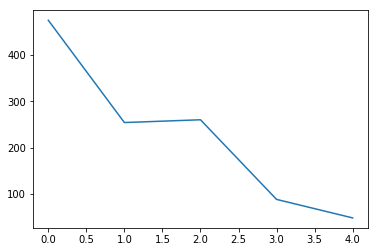

Real Percentage of gain: 135.1763651705711
Percentage of gain: 0.9549364655664391
Total gain: 1076.2133966933768
000000000000000000000000000000000000000000000000
Percentile:  0
[[100 101]
 [104 170]]
0.5684210526315789
Percentile:  1
[[71 33]
 [54 96]]
0.65748031496063
Percentile:  2
[[ 37   1]
 [ 98 124]]
0.6192307692307693
Percentile:  3
[[19  6]
 [30 33]]
0.5909090909090909
Percentile:  4
[[33  4]
 [ 1 10]]
0.8958333333333334
000000000000000000000000000000000000000000000000
Working on... PYPL
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.6349862258953168
G-score: 0.4966678161234674
Accuracy 0.5305580159433126
Window: 140
[[138 180]
 [350 461]]
Vol pos 2.977782902598436
Vol neg 2.833163608925757


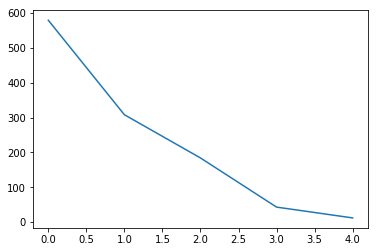

Real Percentage of gain: 40.424630844954834
Percentage of gain: 0.24988064298123305
Total gain: 282.11524592581213
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 55  79]
 [189 256]]
0.5371329879101899
Percentile:  1
[[ 28  23]
 [124 133]]
0.5227272727272727
Percentile:  2
[[48 72]
 [36 28]]
0.41304347826086957
Percentile:  3
[[ 7  6]
 [ 0 30]]
0.8604651162790697
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... GILD
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.6890203813280736
G-score: 0.46477576850088387
Accuracy 0.5806737588652482
Window: 140
[[131 451]
 [ 22 524]]
Vol pos 2.706572007931556
Vol neg 3.9759924482511497


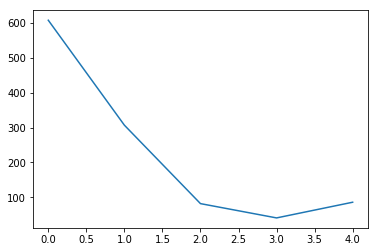

Real Percentage of gain: -199.7433995439439
Percentage of gain: -0.09560262662023473
Total gain: -107.83976282762478
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 70 269]
 [ 11 258]]
0.5394736842105263
Percentile:  1
[[ 54  49]
 [  9 195]]
0.8110749185667753
Percentile:  2
[[ 0 12]
 [ 1 69]]
0.8414634146341463
Percentile:  3
[[ 1 40]
 [ 0  0]]
0.024390243902439025
Percentile:  4
[[ 6 80]
 [ 0  0]]
0.06976744186046512
000000000000000000000000000000000000000000000000
Working on... COST
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.2346491228070175
G-score: 0.3472861848571
Accuracy 0.38065661047027505
Window: 140
[[322  63]
 [635 107]]
Vol pos 1.1803185483166891
Vol neg 1.5151992293521523


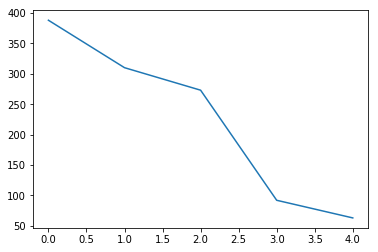

Real Percentage of gain: -140.6993932918687
Percentage of gain: -0.4891325686423627
Total gain: -551.2524048599428
000000000000000000000000000000000000000000000000
Percentile:  0
[[162  38]
 [151  36]]
0.5116279069767442
Percentile:  1
[[ 86  18]
 [186  20]]
0.3419354838709677
Percentile:  2
[[ 61   7]
 [185  20]]
0.2967032967032967
Percentile:  3
[[12  0]
 [69 11]]
0.25
Percentile:  4
[[ 0  0]
 [44 19]]
0.30158730158730157
000000000000000000000000000000000000000000000000
Working on... QCOM
11.725006748852696
0.0
Diff in tren train and test
0.47791519434628976
0.6861184792219275
F1,score 0.524390243902439
G-score: 0.5570541072019086
Accuracy 0.5172413793103449
Window: 140
[[284  71]
 [475 301]]
Vol pos 3.74502037873133
Vol neg 2.930443963635999


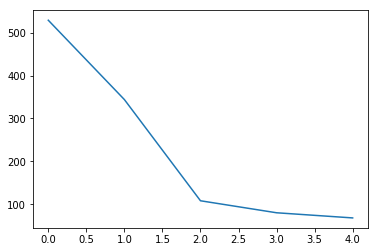

Real Percentage of gain: 58.056783995186485
Percentage of gain: 0.5223824203471024
Total gain: 590.8145174125727
000000000000000000000000000000000000000000000000
Percentile:  0
[[190  40]
 [206  93]]
0.5349716446124764
Percentile:  1
[[ 33  15]
 [192 104]]
0.39825581395348836
Percentile:  2
[[ 2 16]
 [52 38]]
0.37037037037037035
Percentile:  3
[[12  0]
 [25 43]]
0.6875
Percentile:  4
[[46  0]
 [ 0 22]]
1.0
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.4847689762394542
Mean gain over portfolio :  19.090954561834508
Real mean gain over portfolio -27.158987139483248


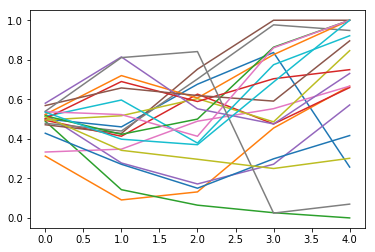

In [3]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    
    
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        y=np.array(y)
        
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        
        x_tv,y_tv=smote(x_tv,y_tv)
        rf = RandomForestClassifier()
        rf.fit(x_tv, y_tv)
        prediction=rf.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rf.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rf.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rf.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rf.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

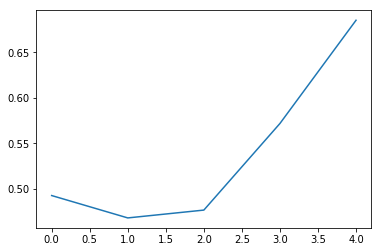

In [4]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.2641509433962264
G-score: 0.3883860469891978
Accuracy 0.5168141592920354
Window: 140
[[486  20]
 [526  98]]
Vol pos 3.280506874722824
Vol neg 3.0602974492013533


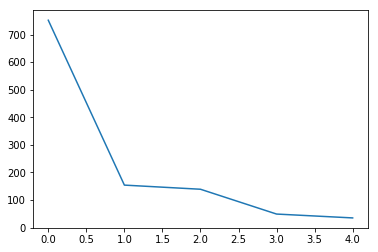

Real Percentage of gain: -20.50752670023244
Percentage of gain: 0.21672000670282332
Total gain: 244.89360757419038
000000000000000000000000000000000000000000000000
Percentile:  0
[[366  12]
 [364  11]]
0.50066401062417
Percentile:  1
[[62  6]
 [73 11]]
0.48026315789473684
Percentile:  2
[[58  2]
 [50 29]]
0.6258992805755396
Percentile:  3
[[ 0  0]
 [ 9 40]]
0.8163265306122449
Percentile:  4
[[ 0  0]
 [28  7]]
0.2
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.08384458077709613
G-score: 0.1901447851522195
Accuracy 0.20848056537102475
Window: 140
[[195  56]
 [840  41]]
Vol pos 1.7524456826248023
Vol neg 2.5237427766745895


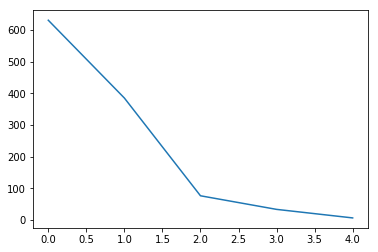

Real Percentage of gain: -273.61917091630994
Percentage of gain: -1.6322405890468012
Total gain: -1847.696346800979
000000000000000000000000000000000000000000000000
Percentile:  0
[[186  13]
 [424   7]]
0.30634920634920637
Percentile:  1
[[  7  29]
 [329  20]]
0.07012987012987013
Percentile:  2
[[ 2 14]
 [56  4]]
0.07894736842105263
Percentile:  3
[[ 0  0]
 [25  8]]
0.24242424242424243
Percentile:  4
[[0 0]
 [5 1]]
0.16666666666666666
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.0919931856899489
G-score: 0.21957751641341994
Accuracy 0.18125960061443933
Window: 140
[[ 91   0]
 [533  27]]
Vol pos 0.935808111386373
Vol neg 2.3362223739722356


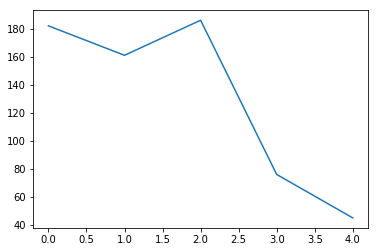

Real Percentage of gain: -108.97751137113003
Percentage of gain: -1.7431354349978643
Total gain: -1134.7811681836097
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 72   0]
 [102   8]]
0.43956043956043955
Percentile:  1
[[ 19   0]
 [140   2]]
0.13043478260869565
Percentile:  2
[[  0   0]
 [176  10]]
0.053763440860215055
Percentile:  3
[[ 0  0]
 [69  7]]
0.09210526315789473
Percentile:  4
[[ 0  0]
 [45  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.592255125284738
G-score: 0.5077182070575939
Accuracy 0.5247787610619469
Window: 140
[[203 252]
 [285 390]]
Vol pos 3.1548533716336746
Vol neg 2.734920368900692


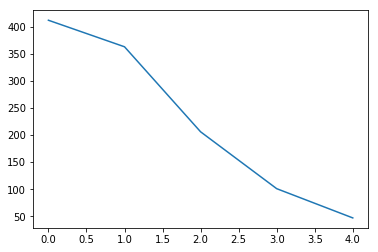

Real Percentage of gain: -10.501776398237345
Percentage of gain: 0.3559077975921216
Total gain: 402.1758112790974
000000000000000000000000000000000000000000000000
Percentile:  0
[[113 119]
 [ 82  97]]
0.5109489051094891
Percentile:  1
[[ 16  95]
 [106 146]]
0.4462809917355372
Percentile:  2
[[68 29]
 [46 63]]
0.6359223300970874
Percentile:  3
[[ 5  9]
 [34 53]]
0.5742574257425742
Percentile:  4
[[ 0  0]
 [17 30]]
0.6382978723404256
000000000000000000000000000000000000000000000000
Working on... MSFT
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.12105263157894737
G-score: 0.2534450242110488
Accuracy 0.4088495575221239
Window: 140
[[416   3]
 [665  46]]
Vol pos 1.318431580408652
Vol neg 1.7526333283731412


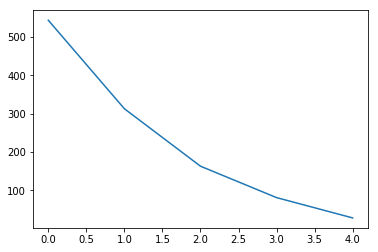

Real Percentage of gain: -45.02318994512295
Percentage of gain: -0.49702979929598334
Total gain: -561.6436732044612
000000000000000000000000000000000000000000000000
Percentile:  0
[[290   2]
 [245   7]]
0.5459558823529411
Percentile:  1
[[ 73   1]
 [220  19]]
0.2939297124600639
Percentile:  2
[[ 23   0]
 [135   5]]
0.17177914110429449
Percentile:  3
[[20  0]
 [52  9]]
0.35802469135802467
Percentile:  4
[[10  0]
 [12  6]]
0.5714285714285714
000000000000000000000000000000000000000000000000
Working on... FB
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.5316653635652853
G-score: 0.5358341028304401
Accuracy 0.4708480565371025
Window: 140
[[193  70]
 [529 340]]
Vol pos 3.373465957906461
Vol neg 2.8144655158844416


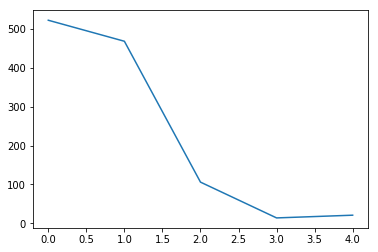

Real Percentage of gain: -71.85128694487106
Percentage of gain: 0.09910999253477314
Total gain: 112.19251154936319
000000000000000000000000000000000000000000000000
Percentile:  0
[[188  24]
 [264  46]]
0.4482758620689655
Percentile:  1
[[  4  33]
 [244 187]]
0.4081196581196581
Percentile:  2
[[ 0 13]
 [18 74]]
0.7047619047619048
Percentile:  3
[[ 0  0]
 [ 2 12]]
0.8571428571428571
Percentile:  4
[[ 0  0]
 [ 1 20]]
0.9523809523809523
000000000000000000000000000000000000000000000000
Working on... INTC
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.04291845493562232
G-score: 0.14808721943977307
Accuracy 0.4090106007067138
Window: 140
[[448   0]
 [669  15]]
Vol pos 2.623814188198739
Vol neg 2.1272962365283554


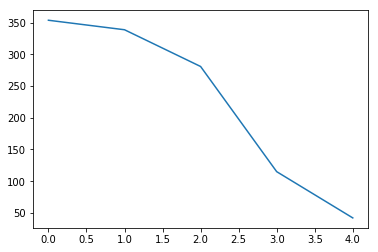

Real Percentage of gain: -92.66440197675783
Percentage of gain: -0.1840417076867964
Total gain: -208.33521310145352
000000000000000000000000000000000000000000000000
Percentile:  0
[[116   0]
 [234   4]]
0.3389830508474576
Percentile:  1
[[114   0]
 [222   6]]
0.3508771929824561
Percentile:  2
[[127   0]
 [147   4]]
0.4712230215827338
Percentile:  3
[[63  0]
 [51  0]]
0.5526315789473685
Percentile:  4
[[28  0]
 [13  1]]
0.6904761904761905
000000000000000000000000000000000000000000000000
Working on... CSCO
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.49897750511247446
G-score: 0.5555672023004663
Accuracy 0.5644444444444444
Window: 140
[[391  86]
 [404 244]]
Vol pos 2.2145188222626766
Vol neg 1.358360334763356


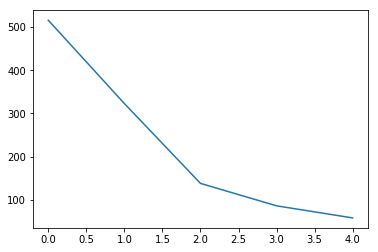

Real Percentage of gain: 46.37941657236259
Percentage of gain: 0.658331456091338
Total gain: 740.6228881027553
000000000000000000000000000000000000000000000000
Percentile:  0
[[172  48]
 [203  93]]
0.5135658914728682
Percentile:  1
[[ 62  34]
 [157  70]]
0.4086687306501548
Percentile:  2
[[47  3]
 [29 59]]
0.7681159420289855
Percentile:  3
[[57  1]
 [ 6 22]]
0.9186046511627907
Percentile:  4
[[52  0]
 [ 6  0]]
0.896551724137931
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.6223404255319148
G-score: 0.37488737047350706
Accuracy 0.49823321554770317
Window: 140
[[ 96 444]
 [124 468]]
Vol pos 3.1004679150082963
Vol neg 2.6151377256200776


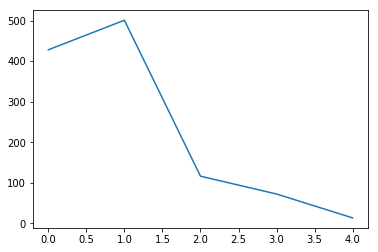

Real Percentage of gain: 106.73757131214336
Percentage of gain: 0.23256685151278708
Total gain: 263.265675912475
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 27 200]
 [ 37 164]]
0.4462616822429907
Percentile:  1
[[ 20 177]
 [ 79 225]]
0.48902195608782434
Percentile:  2
[[ 3 39]
 [ 8 66]]
0.5948275862068966
Percentile:  3
[[32 28]
 [ 0 12]]
0.6111111111111112
Percentile:  4
[[13]]
1.0
000000000000000000000000000000000000000000000000
Working on... NVDA
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.5575539568345323
G-score: 0.5723773252134717
Accuracy 0.5653710247349824
Window: 140
[[330 146]
 [346 310]]
Vol pos 4.042729839643172
Vol neg 3.4146813262914444


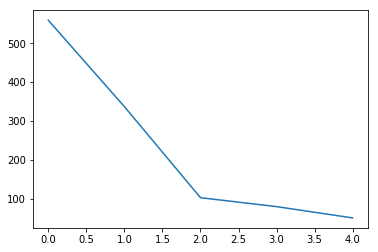

Real Percentage of gain: 90.36360824104452
Percentage of gain: 0.8015228664631092
Total gain: 907.3238848362396
000000000000000000000000000000000000000000000000
Percentile:  0
[[211 102]
 [158  88]]
0.5348837209302325
Percentile:  1
[[104  13]
 [113 107]]
0.6261127596439169
Percentile:  2
[[15 16]
 [50 22]]
0.3592233009708738
Percentile:  3
[[ 0 15]
 [18 47]]
0.5875
Percentile:  4
[[ 0  0]
 [ 6 45]]
0.8823529411764706
000000000000000000000000000000000000000000000000
Working on... NFLX
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.1849462365591398
G-score: 0.31602686801933005
Accuracy 0.3303886925795053
Window: 140
[[288   9]
 [749  86]]
Vol pos 3.510673071723214
Vol neg 4.744213410212249


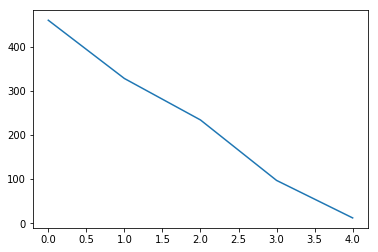

Real Percentage of gain: -294.5639191299243
Percentage of gain: -2.01689225805336
Total gain: -2283.1220361164033
000000000000000000000000000000000000000000000000
Percentile:  0
[[167   3]
 [267  23]]
0.41304347826086957
Percentile:  1
[[ 54   6]
 [213  55]]
0.3323170731707317
Percentile:  2
[[ 38   0]
 [189   6]]
0.1888412017167382
Percentile:  3
[[27  0]
 [70  0]]
0.27835051546391754
Percentile:  4
[[1 0]
 [9 2]]
0.25
000000000000000000000000000000000000000000000000
Working on... BKNG
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.7932330827067671
G-score: 0.6815462172917656
Accuracy 0.7236180904522613
Window: 140
[[ 77  54]
 [ 56 211]]
Vol pos 1.369172208529347
Vol neg 0.6883573226784068


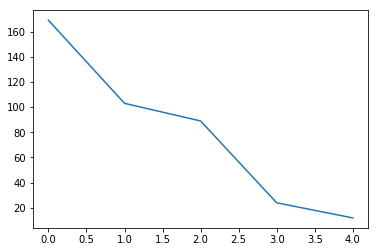

Real Percentage of gain: 194.89747254309074
Percentage of gain: 0.8005082677432844
Total gain: 318.6022905618272
000000000000000000000000000000000000000000000000
Percentile:  0
[[45 52]
 [31 44]]
0.5174418604651163
Percentile:  1
[[24  2]
 [ 6 68]]
0.92
Percentile:  2
[[ 7  0]
 [17 65]]
0.8089887640449438
Percentile:  3
[[ 0  0]
 [ 2 21]]
0.9130434782608695
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.6478190630048465
G-score: 0.6381733221802389
Accuracy 0.6138175376439327
Window: 140
[[292  96]
 [340 401]]
Vol pos 2.8458071348816834
Vol neg 2.2180956359165687


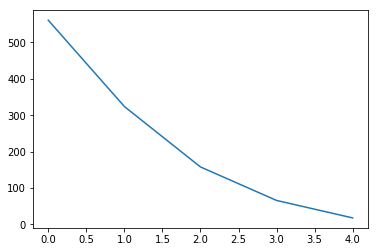

Real Percentage of gain: 82.76256729083764
Percentage of gain: 0.8902166937231023
Total gain: 1005.0546472133826
000000000000000000000000000000000000000000000000
Percentile:  0
[[182  95]
 [156 128]]
0.5525846702317291
Percentile:  1
[[ 62   1]
 [114 147]]
0.6450617283950617
Percentile:  2
[[25  0]
 [58 75]]
0.6329113924050633
Percentile:  3
[[23  0]
 [12 31]]
0.8181818181818182
Percentile:  4
[[18]]
1.0
000000000000000000000000000000000000000000000000
Working on... AMGN
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.7285353535353535
G-score: 0.5103688261735462
Accuracy 0.6170970614425646
Window: 140
[[116 204]
 [226 577]]
Vol pos 2.1553870324619484
Vol neg 1.5700149815713484


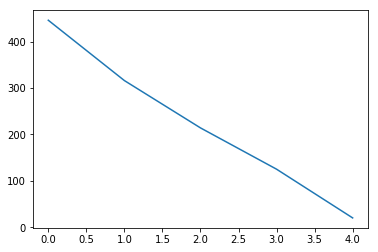

Real Percentage of gain: 169.87986774559653
Percentage of gain: 0.7289196539808107
Total gain: 818.5767714204504
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 26 139]
 [ 88 193]]
0.4910313901345291
Percentile:  1
[[ 23  32]
 [ 69 192]]
0.680379746835443
Percentile:  2
[[ 15  11]
 [ 61 127]]
0.6635514018691588
Percentile:  3
[[37 19]
 [ 8 61]]
0.784
Percentile:  4
[[14  3]
 [ 0  3]]
0.85
000000000000000000000000000000000000000000000000
Working on... TXN
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.6463022508038585
G-score: 0.6432440380388345
Accuracy 0.6109637488947833
Window: 140
[[289  79]
 [361 402]]
Vol pos 2.4778945731893605
Vol neg 2.5240335292894507


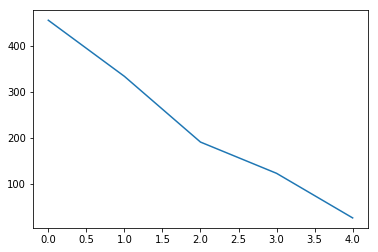

Real Percentage of gain: 100.96364435974489
Percentage of gain: 0.531963215903174
Total gain: 601.6503971864897
000000000000000000000000000000000000000000000000
Percentile:  0
[[134  74]
 [116 131]]
0.5824175824175825
Percentile:  1
[[124   5]
 [ 71 134]]
0.7724550898203593
Percentile:  2
[[ 14   0]
 [118  60]]
0.3854166666666667
Percentile:  3
[[10  0]
 [52 60]]
0.5737704918032787
Percentile:  4
[[ 7  0]
 [ 3 16]]
0.8846153846153846
000000000000000000000000000000000000000000000000
Working on... AVGO
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.6419753086419752
G-score: 0.5924674465589889
Accuracy 0.5882874889086069
Window: 140
[[247 159]
 [305 416]]
Vol pos 3.696498442175112
Vol neg 2.495247143279445


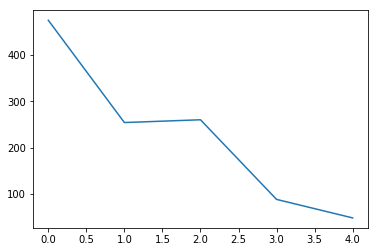

Real Percentage of gain: 98.27440028930774
Percentage of gain: 1.1472793191485686
Total gain: 1292.9837926804369
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 91 110]
 [127 147]]
0.5010526315789474
Percentile:  1
[[58 46]
 [75 75]]
0.5236220472440944
Percentile:  2
[[ 35   3]
 [ 83 139]]
0.6692307692307692
Percentile:  3
[[25  0]
 [20 43]]
0.7727272727272727
Percentile:  4
[[37  0]
 [ 0 11]]
1.0
000000000000000000000000000000000000000000000000
Working on... PYPL
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.6820405310971348
G-score: 0.5932563507762174
Accuracy 0.5969884853852967
Window: 140
[[186 132]
 [323 488]]
Vol pos 3.106159365568237
Vol neg 2.619158810976092


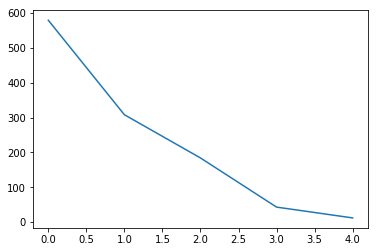

Real Percentage of gain: 14.37452146568218
Percentage of gain: 0.7987902155880156
Total gain: 901.8341533988696
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 74  60]
 [185 260]]
0.5768566493955095
Percentile:  1
[[ 30  21]
 [115 142]]
0.5584415584415584
Percentile:  2
[[77 43]
 [22 42]]
0.6467391304347826
Percentile:  3
[[ 5  8]
 [ 0 30]]
0.813953488372093
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... GILD
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.6268656716417911
G-score: 0.47415353018025175
Accuracy 0.5345744680851063
Window: 140
[[162 420]
 [105 441]]
Vol pos 3.270721685219159
Vol neg 3.2022931752967803


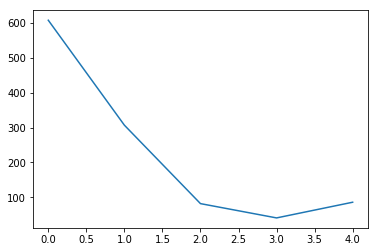

Real Percentage of gain: -128.9739828017254
Percentage of gain: 0.25801530067051714
Total gain: 291.04125915634336
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 62 277]
 [ 57 212]]
0.4506578947368421
Percentile:  1
[[ 56  47]
 [ 47 157]]
0.6938110749185668
Percentile:  2
[[ 2 10]
 [ 0 70]]
0.8780487804878049
Percentile:  3
[[12 29]
 [ 0  0]]
0.2926829268292683
Percentile:  4
[[30 56]
 [ 0  0]]
0.3488372093023256
000000000000000000000000000000000000000000000000
Working on... COST
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.09535452322738386
G-score: 0.21796642849625364
Accuracy 0.3433895297249335
Window: 140
[[348  37]
 [703  39]]
Vol pos 0.9942751063600498
Vol neg 1.5934881799382732


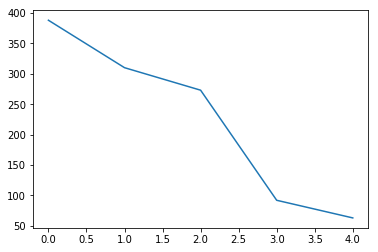

Real Percentage of gain: -199.05688047722623
Percentage of gain: -0.7048773620168438
Total gain: -794.3967869929829
000000000000000000000000000000000000000000000000
Percentile:  0
[[191   9]
 [180   7]]
0.5116279069767442
Percentile:  1
[[ 88  16]
 [194  12]]
0.3225806451612903
Percentile:  2
[[ 59   9]
 [194  11]]
0.2564102564102564
Percentile:  3
[[ 9  3]
 [71  9]]
0.1956521739130435
Percentile:  4
[[ 0  0]
 [63  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... QCOM
11.725006748852696
0.0
Diff in tren train and test
0.47791519434628976
0.6861184792219275
F1,score 0.5270506108202443
G-score: 0.560918007538076
Accuracy 0.5207780725022104
Window: 140
[[287  68]
 [474 302]]
Vol pos 3.723020856276653
Vol neg 2.948339559697666


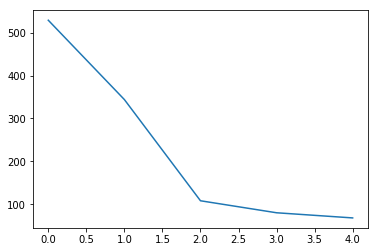

Real Percentage of gain: 48.81791516245493
Percentage of gain: 0.5259586587009848
Total gain: 594.8592429908138
000000000000000000000000000000000000000000000000
Percentile:  0
[[194  36]
 [209  90]]
0.5368620037807184
Percentile:  1
[[ 32  16]
 [192 104]]
0.3953488372093023
Percentile:  2
[[ 2 16]
 [35 55]]
0.5277777777777778
Percentile:  3
[[12  0]
 [38 30]]
0.525
Percentile:  4
[[46  0]
 [ 0 22]]
1.0
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.49139965807258595
Mean gain over portfolio :  83.25508547314226
Real mean gain over portfolio -14.614433083963618


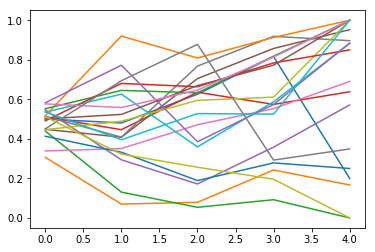

In [5]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    
    
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        y=np.array(y)
        
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        
        x_tv,y_tv=smote(x_tv,y_tv)
        rf = RandomForestClassifier()
        rf.fit(x_tv, y_tv)
        prediction=rf.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rf.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rf.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rf.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rf.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

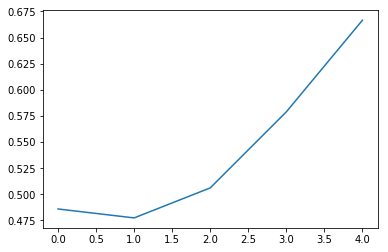

In [6]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.3152317880794702
G-score: 0.4314886753361512
Accuracy 0.5424778761061947
Window: 140
[[494  12]
 [505 119]]
Vol pos 3.5212709101291915
Vol neg 2.7624745729069122


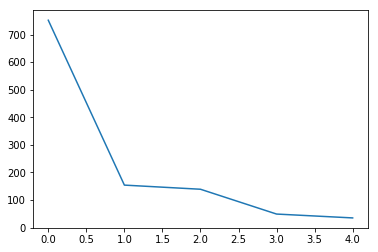

Real Percentage of gain: -3.2497401684721856
Percentage of gain: 0.6463183307224076
Total gain: 730.3397137163206
000000000000000000000000000000000000000000000000
Percentile:  0
[[370   8]
 [371   4]]
0.49667994687915007
Percentile:  1
[[64  4]
 [64 20]]
0.5526315789473685
Percentile:  2
[[60  0]
 [34 45]]
0.7553956834532374
Percentile:  3
[[ 0  0]
 [10 39]]
0.7959183673469388
Percentile:  4
[[ 0  0]
 [24 11]]
0.3142857142857143
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.13386613386613386
G-score: 0.24493180417473995
Accuracy 0.23409893992932862
Window: 140
[[198  53]
 [814  67]]
Vol pos 2.2778053733895725
Vol neg 2.388964573300635


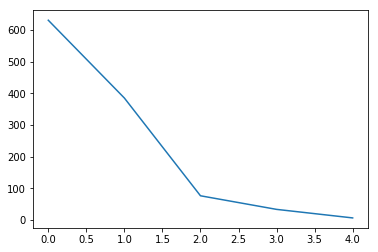

Real Percentage of gain: -263.10287824340963
Percentage of gain: -1.296478675886408
Total gain: -1467.613861103414
000000000000000000000000000000000000000000000000
Percentile:  0
[[186  13]
 [426   5]]
0.30317460317460315
Percentile:  1
[[ 11  25]
 [323  26]]
0.09610389610389611
Percentile:  2
[[ 1 15]
 [49 11]]
0.15789473684210525
Percentile:  3
[[ 0  0]
 [10 23]]
0.696969696969697
Percentile:  4
[[0 0]
 [5 1]]
0.16666666666666666
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.26893353941267384
G-score: 0.3941537046091827
Accuracy 0.27342549923195086
Window: 140
[[ 91   0]
 [473  87]]
Vol pos 1.47587900446909
Vol neg 2.3106245659097193


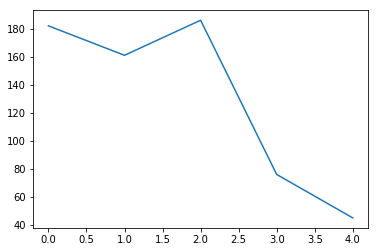

Real Percentage of gain: -97.19316548587264
Percentage of gain: -1.275297936835329
Total gain: -830.2189568797992
000000000000000000000000000000000000000000000000
Percentile:  0
[[72  0]
 [90 20]]
0.5054945054945055
Percentile:  1
[[ 19   0]
 [141   1]]
0.12422360248447205
Percentile:  2
[[  0   0]
 [129  57]]
0.3064516129032258
Percentile:  3
[[ 0  0]
 [67  9]]
0.11842105263157894
Percentile:  4
[[ 0  0]
 [45  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.5825688073394495
G-score: 0.5018257265516185
Accuracy 0.5168141592920354
Window: 140
[[203 252]
 [294 381]]
Vol pos 3.117099968519691
Vol neg 2.782223270811247


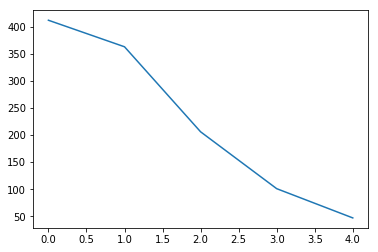

Real Percentage of gain: -12.587057372998876
Percentage of gain: 0.2666305095155388
Total gain: 301.29247575255886
000000000000000000000000000000000000000000000000
Percentile:  0
[[114 118]
 [ 87  92]]
0.5012165450121655
Percentile:  1
[[ 22  89]
 [101 151]]
0.4765840220385675
Percentile:  2
[[61 36]
 [55 54]]
0.558252427184466
Percentile:  3
[[ 5  9]
 [36 51]]
0.5544554455445545
Percentile:  4
[[ 0  0]
 [15 32]]
0.6808510638297872
000000000000000000000000000000000000000000000000
Working on... MSFT
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.06521739130434781
G-score: 0.18350671036191707
Accuracy 0.3911504424778761
Window: 140
[[418   1]
 [687  24]]
Vol pos 1.2280837768796202
Vol neg 1.7980543955250927


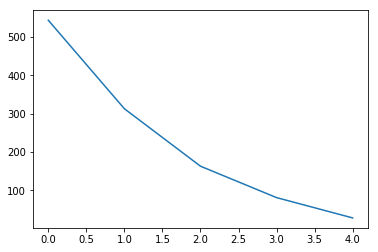

Real Percentage of gain: -47.51615670574772
Percentage of gain: -0.614379110389798
Total gain: -694.2483947404717
000000000000000000000000000000000000000000000000
Percentile:  0
[[292   0]
 [245   7]]
0.5496323529411765
Percentile:  1
[[ 73   1]
 [231   8]]
0.25878594249201275
Percentile:  2
[[ 23   0]
 [137   3]]
0.15950920245398773
Percentile:  3
[[20  0]
 [55  6]]
0.32098765432098764
Percentile:  4
[[10  0]
 [18  0]]
0.35714285714285715
000000000000000000000000000000000000000000000000
Working on... FB
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.5554693560899923
G-score: 0.5611148720030666
Accuracy 0.49381625441696114
Window: 140
[[201  62]
 [511 358]]
Vol pos 3.332841847253695
Vol neg 2.8287322983666843


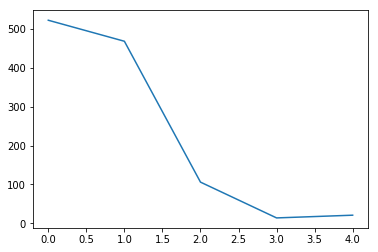

Real Percentage of gain: -61.23855329054069
Percentage of gain: 0.21395316753595878
Total gain: 242.19498565070532
000000000000000000000000000000000000000000000000
Percentile:  0
[[196  16]
 [253  57]]
0.4846743295019157
Percentile:  1
[[  4  33]
 [240 191]]
0.4166666666666667
Percentile:  2
[[ 0 13]
 [18 74]]
0.7047619047619048
Percentile:  3
[[14]]
1.0
Percentile:  4
[[21]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.011627906976744186
G-score: 0.07647191129018724
Accuracy 0.3992932862190813
Window: 140
[[448   0]
 [680   4]]
Vol pos 2.638731275133096
Vol neg 2.125412669137244


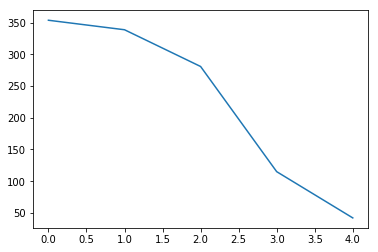

Real Percentage of gain: -101.28471588109682
Percentage of gain: -0.22312197760880448
Total gain: -252.57407865316668
000000000000000000000000000000000000000000000000
Percentile:  0
[[116   0]
 [238   0]]
0.327683615819209
Percentile:  1
[[114   0]
 [227   1]]
0.3362573099415205
Percentile:  2
[[127   0]
 [149   2]]
0.46402877697841727
Percentile:  3
[[63  0]
 [51  0]]
0.5526315789473685
Percentile:  4
[[28  0]
 [13  1]]
0.6904761904761905
000000000000000000000000000000000000000000000000
Working on... CSCO
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.583955223880597
G-score: 0.6087879098300277
Accuracy 0.6035555555555555
Window: 140
[[366 111]
 [335 313]]
Vol pos 2.2370403878479013
Vol neg 1.2396089525159597


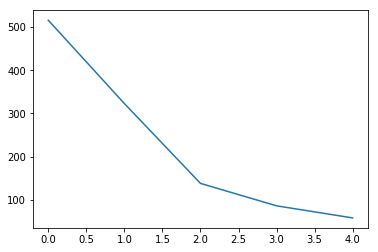

Real Percentage of gain: 96.09813906701878
Percentage of gain: 0.8587420715792062
Total gain: 966.0848305266069
000000000000000000000000000000000000000000000000
Percentile:  0
[[147  73]
 [177 119]]
0.5155038759689923
Percentile:  1
[[ 64  32]
 [126 101]]
0.5108359133126935
Percentile:  2
[[44  6]
 [22 66]]
0.7971014492753623
Percentile:  3
[[58  0]
 [ 3 25]]
0.9651162790697675
Percentile:  4
[[52  0]
 [ 4  2]]
0.9310344827586207
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.6480446927374302
G-score: 0.48789142033657246
Accuracy 0.5547703180212014
Window: 140
[[164 376]
 [128 464]]
Vol pos 3.0272458337127675
Vol neg 2.6447455330263203


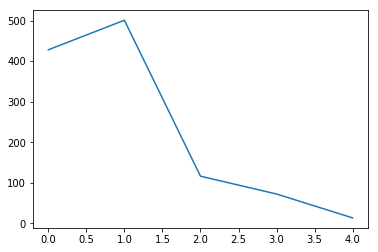

Real Percentage of gain: 144.97066014669903
Percentage of gain: 0.501906921313032
Total gain: 568.1586349263523
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 50 177]
 [ 33 168]]
0.5093457943925234
Percentile:  1
[[ 52 145]
 [ 69 235]]
0.5728542914171657
Percentile:  2
[[ 9 33]
 [21 53]]
0.5344827586206896
Percentile:  3
[[40 20]
 [ 5  7]]
0.6527777777777778
Percentile:  4
[[12  1]
 [ 0  0]]
0.9230769230769231
000000000000000000000000000000000000000000000000
Working on... NVDA
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.5217391304347827
G-score: 0.5562027952984846
Accuracy 0.5530035335689046
Window: 140
[[350 126]
 [380 276]]
Vol pos 4.339536572369589
Vol neg 3.064862481430159


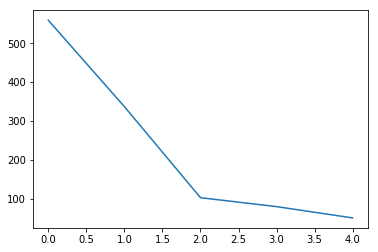

Real Percentage of gain: 44.149143104621636
Percentage of gain: 1.0297963592753554
Total gain: 1165.7294786997022
000000000000000000000000000000000000000000000000
Percentile:  0
[[232  81]
 [193  53]]
0.5098389982110912
Percentile:  1
[[110   7]
 [142  78]]
0.5578635014836796
Percentile:  2
[[ 8 23]
 [39 33]]
0.39805825242718446
Percentile:  3
[[ 0 15]
 [ 3 62]]
0.775
Percentile:  4
[[ 0  0]
 [ 2 49]]
0.9607843137254902
000000000000000000000000000000000000000000000000
Working on... NFLX
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.24746450304259635
G-score: 0.3630996664409256
Accuracy 0.34452296819787986
Window: 140
[[268  29]
 [713 122]]
Vol pos 4.07737613560237
Vol neg 4.472949866415693


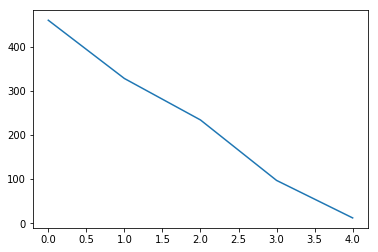

Real Percentage of gain: -247.52032792427835
Percentage of gain: -1.5271661731409185
Total gain: -1728.7521079955197
000000000000000000000000000000000000000000000000
Percentile:  0
[[164   6]
 [264  26]]
0.41304347826086957
Percentile:  1
[[ 38  22]
 [225  43]]
0.24695121951219512
Percentile:  2
[[ 37   1]
 [171  24]]
0.26180257510729615
Percentile:  3
[[27  0]
 [43 27]]
0.5567010309278351
Percentile:  4
[[ 1  0]
 [10  1]]
0.16666666666666666
000000000000000000000000000000000000000000000000
Working on... BKNG
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.8094218415417558
G-score: 0.8052490972274616
Accuracy 0.7763819095477387
Window: 140
[[120  11]
 [ 78 189]]
Vol pos 1.2941236632782116
Vol neg 0.7882774112147101


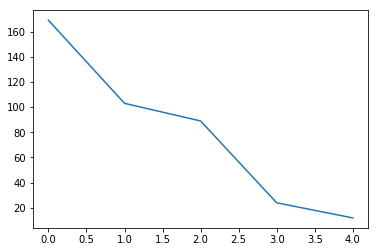

Real Percentage of gain: 218.55960686704088
Percentage of gain: 0.8284611114443673
Total gain: 329.7275223548582
000000000000000000000000000000000000000000000000
Percentile:  0
[[86 11]
 [48 27]]
0.6569767441860465
Percentile:  1
[[26  0]
 [15 59]]
0.85
Percentile:  2
[[ 7  0]
 [10 72]]
0.8876404494382022
Percentile:  3
[[ 0  0]
 [ 5 18]]
0.782608695652174
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.4193548387096773
G-score: 0.49959288906263805
Accuracy 0.48981399468556247
Window: 140
[[345  43]
 [533 208]]
Vol pos 2.824653015930223
Vol neg 2.390973826255584


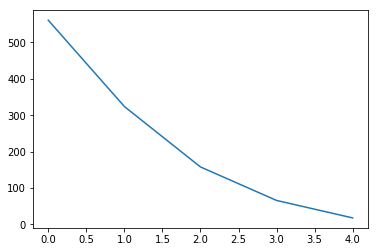

Real Percentage of gain: -149.5634041707036
Percentage of gain: 0.1637131921046916
Total gain: 184.83219388619682
000000000000000000000000000000000000000000000000
Percentile:  0
[[234  43]
 [239  45]]
0.49732620320855614
Percentile:  1
[[ 63   0]
 [197  64]]
0.39197530864197533
Percentile:  2
[[25  0]
 [85 48]]
0.4620253164556962
Percentile:  3
[[23  0]
 [11 32]]
0.8333333333333334
Percentile:  4
[[18]]
1.0
000000000000000000000000000000000000000000000000
Working on... AMGN
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.7232142857142857
G-score: 0.5188462509544753
Accuracy 0.6135351736420303
Window: 140
[[122 198]
 [236 567]]
Vol pos 2.109693906727614
Vol neg 1.6479505848766924


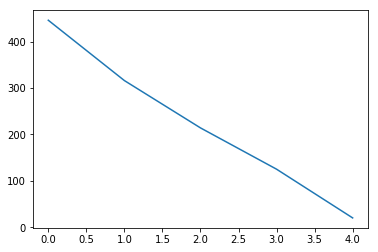

Real Percentage of gain: 166.20030943688803
Percentage of gain: 0.6574964807647743
Total gain: 738.3685478988415
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 42 123]
 [ 89 192]]
0.5246636771300448
Percentile:  1
[[ 20  35]
 [ 80 181]]
0.6360759493670886
Percentile:  2
[[  9  17]
 [ 54 134]]
0.6682242990654206
Percentile:  3
[[37 19]
 [13 56]]
0.744
Percentile:  4
[[13  4]
 [ 0  3]]
0.8
000000000000000000000000000000000000000000000000
Working on... TXN
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.5676625659050967
G-score: 0.6029185196631329
Accuracy 0.5649867374005305
Window: 140
[[316  52]
 [440 323]]
Vol pos 2.188581341784059
Vol neg 2.8949114340674678


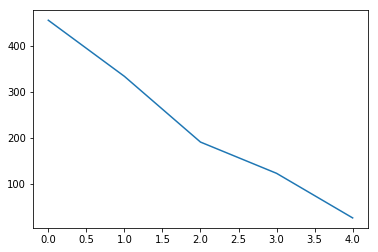

Real Percentage of gain: 63.846978914705886
Percentage of gain: -0.022805436039947346
Total gain: -25.792948161180448
000000000000000000000000000000000000000000000000
Percentile:  0
[[159  49]
 [135 112]]
0.5956043956043956
Percentile:  1
[[126   3]
 [ 70 135]]
0.781437125748503
Percentile:  2
[[ 14   0]
 [129  49]]
0.328125
Percentile:  3
[[ 10   0]
 [101  11]]
0.1721311475409836
Percentile:  4
[[ 7  0]
 [ 4 15]]
0.8461538461538461
000000000000000000000000000000000000000000000000
Working on... AVGO
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.7123287671232877
G-score: 0.6702632952433182
Accuracy 0.6645962732919255
Window: 140
[[281 125]
 [253 468]]
Vol pos 3.4797823718095735
Vol neg 2.6513654633819796


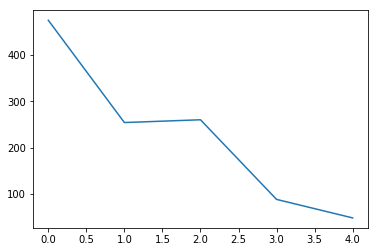

Real Percentage of gain: 169.84410334712894
Percentage of gain: 1.4233725388881828
Total gain: 1604.140851326982
000000000000000000000000000000000000000000000000
Percentile:  0
[[105  96]
 [ 92 182]]
0.6042105263157894
Percentile:  1
[[79 25]
 [56 94]]
0.6811023622047244
Percentile:  2
[[ 34   4]
 [ 89 133]]
0.6423076923076924
Percentile:  3
[[25  0]
 [16 47]]
0.8181818181818182
Percentile:  4
[[37  0]
 [ 0 11]]
1.0
000000000000000000000000000000000000000000000000
Working on... PYPL
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.6391608391608392
G-score: 0.5257707386300698
Accuracy 0.5429583702391497
Window: 140
[[156 162]
 [354 457]]
Vol pos 3.1870229420856937
Vol neg 2.5806659067608244


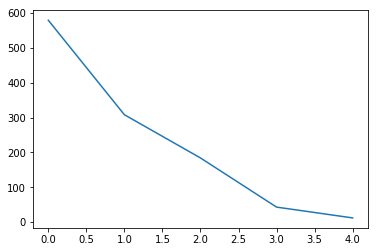

Real Percentage of gain: -12.375546896363284
Percentage of gain: 0.5509490306553984
Total gain: 622.0214556099447
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 63  71]
 [223 222]]
0.49222797927461137
Percentile:  1
[[ 29  22]
 [110 147]]
0.5714285714285714
Percentile:  2
[[59 61]
 [18 46]]
0.5706521739130435
Percentile:  3
[[ 5  8]
 [ 1 29]]
0.7906976744186046
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... GILD
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.702239789196311
G-score: 0.4897492838058894
Accuracy 0.599290780141844
Window: 140
[[143 439]
 [ 13 533]]
Vol pos 3.0357594816692988
Vol neg 3.5426453177201713


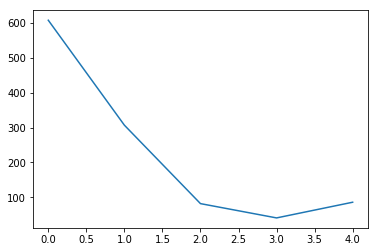

Real Percentage of gain: -85.80252204730883
Percentage of gain: 0.3997320265947948
Total gain: 450.89772599892854
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 54 285]
 [  1 268]]
0.5296052631578947
Percentile:  1
[[ 54  49]
 [ 12 192]]
0.8013029315960912
Percentile:  2
[[ 4  8]
 [ 0 70]]
0.9024390243902439
Percentile:  3
[[ 4 37]
 [ 0  0]]
0.0975609756097561
Percentile:  4
[[27 59]
 [ 0  0]]
0.313953488372093
000000000000000000000000000000000000000000000000
Working on... COST
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.31158714703018503
G-score: 0.3816052561202247
Accuracy 0.37267080745341613
Window: 140
[[260 125]
 [582 160]]
Vol pos 0.9731358083737076
Vol neg 1.6340151057973185


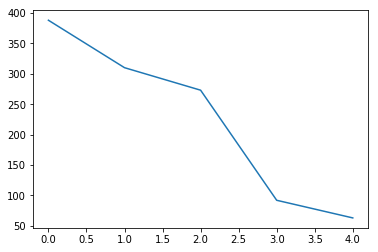

Real Percentage of gain: -164.84352781063586
Percentage of gain: -0.6624060694602902
Total gain: -746.5316402817471
000000000000000000000000000000000000000000000000
Percentile:  0
[[141  59]
 [112  75]]
0.5581395348837209
Percentile:  1
[[ 74  30]
 [158  48]]
0.3935483870967742
Percentile:  2
[[ 35  33]
 [176  29]]
0.23443223443223443
Percentile:  3
[[ 9  3]
 [73  7]]
0.17391304347826086
Percentile:  4
[[ 0  0]
 [62  1]]
0.015873015873015872
000000000000000000000000000000000000000000000000
Working on... QCOM
11.725006748852696
0.0
Diff in tren train and test
0.47791519434628976
0.6861184792219275
F1,score 0.5347222222222222
G-score: 0.5664626366207943
Accuracy 0.5260831122900088
Window: 140
[[287  68]
 [468 308]]
Vol pos 3.7760590747647136
Vol neg 2.880791373541188


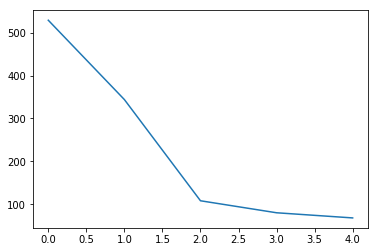

Real Percentage of gain: 50.094013237063834
Percentage of gain: 0.6212652283527211
Total gain: 702.6509732669276
000000000000000000000000000000000000000000000000
Percentile:  0
[[194  36]
 [210  89]]
0.5349716446124764
Percentile:  1
[[ 34  14]
 [193 103]]
0.39825581395348836
Percentile:  2
[[ 2 16]
 [37 53]]
0.5092592592592593
Percentile:  3
[[10  2]
 [28 40]]
0.625
Percentile:  4
[[46  0]
 [ 0 22]]
1.0
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.5028622995854588
Mean gain over portfolio :  143.03537008998137
Real mean gain over portfolio -14.625732093813067


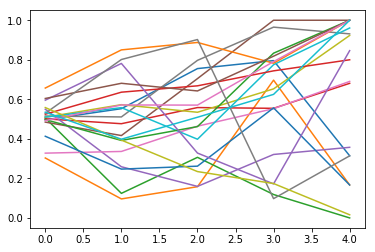

In [7]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    
    
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        y=np.array(y)
        
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        
        x_tv,y_tv=smote(x_tv,y_tv)
        rf = RandomForestClassifier()
        rf.fit(x_tv, y_tv)
        prediction=rf.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rf.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rf.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rf.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rf.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

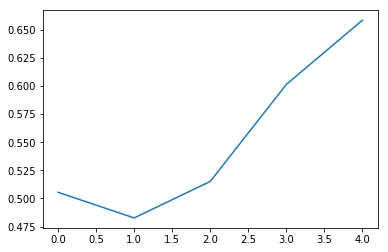

In [8]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.311284046692607
G-score: 0.4266687411270133
Accuracy 0.5300884955752212
Window: 140
[[479  27]
 [504 120]]
Vol pos 3.4550292155921882
Vol neg 2.857205126106113


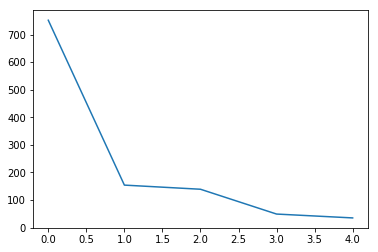

Real Percentage of gain: -1.0754689400229593
Percentage of gain: 0.4888376798029863
Total gain: 552.3865781773745
000000000000000000000000000000000000000000000000
Percentile:  0
[[365  13]
 [368   7]]
0.4940239043824701
Percentile:  1
[[60  8]
 [68 16]]
0.5
Percentile:  2
[[54  6]
 [32 47]]
0.7266187050359713
Percentile:  3
[[ 0  0]
 [11 38]]
0.7755102040816326
Percentile:  4
[[ 0  0]
 [24 11]]
0.3142857142857143
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.15
G-score: 0.2649665124396937
Accuracy 0.24911660777385158
Window: 140
[[207  44]
 [806  75]]
Vol pos 2.292509908778479
Vol neg 2.386309311440418


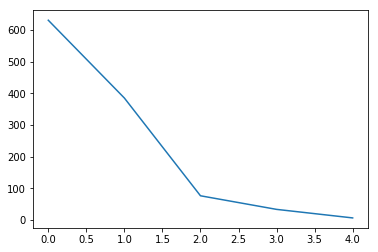

Real Percentage of gain: -242.30435650553815
Percentage of gain: -1.220737738912389
Total gain: -1381.8751204488244
000000000000000000000000000000000000000000000000
Percentile:  0
[[194   5]
 [423   8]]
0.32063492063492066
Percentile:  1
[[ 13  23]
 [323  26]]
0.1012987012987013
Percentile:  2
[[ 0 16]
 [48 12]]
0.15789473684210525
Percentile:  3
[[ 0  0]
 [ 7 26]]
0.7878787878787878
Percentile:  4
[[0 0]
 [4 2]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.19808306709265172
G-score: 0.3253424714126124
Accuracy 0.22887864823348694
Window: 140
[[ 87   4]
 [498  62]]
Vol pos 1.1698669854167818
Vol neg 2.3532304813619396


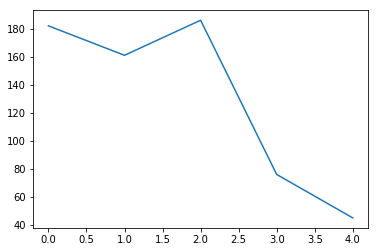

Real Percentage of gain: -83.99325341133884
Percentage of gain: -1.5468686955708035
Total gain: -1007.0115208165931
000000000000000000000000000000000000000000000000
Percentile:  0
[[68  4]
 [90 20]]
0.4835164835164835
Percentile:  1
[[ 19   0]
 [125  17]]
0.2236024844720497
Percentile:  2
[[  0   0]
 [176  10]]
0.053763440860215055
Percentile:  3
[[ 0  0]
 [64 12]]
0.15789473684210525
Percentile:  4
[[ 0  0]
 [42  3]]
0.06666666666666667
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.5316455696202531
G-score: 0.470097280348922
Accuracy 0.4761061946902655
Window: 140
[[202 253]
 [339 336]]
Vol pos 3.1455362973163554
Vol neg 2.7824016208145963


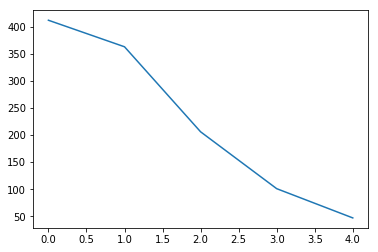

Real Percentage of gain: -42.222883207612796
Percentage of gain: 0.039926343746865676
Total gain: 45.116768433958214
000000000000000000000000000000000000000000000000
Percentile:  0
[[123 109]
 [108  71]]
0.4720194647201946
Percentile:  1
[[ 16  95]
 [119 133]]
0.41046831955922863
Percentile:  2
[[57 40]
 [55 54]]
0.5388349514563107
Percentile:  3
[[ 5  9]
 [41 46]]
0.504950495049505
Percentile:  4
[[ 0  0]
 [16 31]]
0.6595744680851063
000000000000000000000000000000000000000000000000
Working on... MSFT
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.1111111111111111
G-score: 0.23752876344457174
Accuracy 0.3769911504424779
Window: 140
[[382  37]
 [667  44]]
Vol pos 1.221063743160057
Vol neg 1.789348435960045


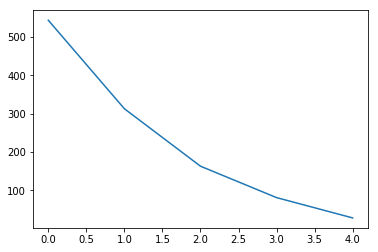

Real Percentage of gain: -60.89802143333742
Percentage of gain: -0.6544496852475109
Total gain: -739.5281443296873
000000000000000000000000000000000000000000000000
Percentile:  0
[[266  26]
 [234  18]]
0.5220588235294118
Percentile:  1
[[ 69   5]
 [225  14]]
0.26517571884984026
Percentile:  2
[[ 21   2]
 [136   4]]
0.15337423312883436
Percentile:  3
[[19  1]
 [54  7]]
0.32098765432098764
Percentile:  4
[[ 7  3]
 [17  1]]
0.2857142857142857
000000000000000000000000000000000000000000000000
Working on... FB
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.5573518090839107
G-score: 0.5557555756515389
Accuracy 0.4920494699646643
Window: 140
[[195  68]
 [507 362]]
Vol pos 3.391443514894229
Vol neg 2.7737185422310273


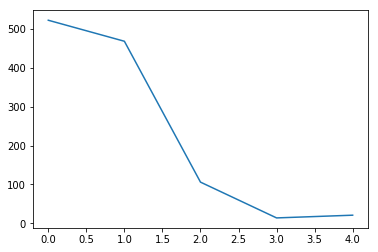

Real Percentage of gain: -62.421273215046625
Percentage of gain: 0.2598461802237145
Total gain: 294.1458760132448
000000000000000000000000000000000000000000000000
Percentile:  0
[[189  23]
 [256  54]]
0.46551724137931033
Percentile:  1
[[  5  32]
 [233 198]]
0.4337606837606838
Percentile:  2
[[ 0 13]
 [18 74]]
0.7047619047619048
Percentile:  3
[[14]]
1.0
Percentile:  4
[[21]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.005830903790087463
G-score: 0.054073807043587524
Accuracy 0.39752650176678445
Window: 140
[[448   0]
 [682   2]]
Vol pos 2.6284043736722524
Vol neg 2.1337319402067036


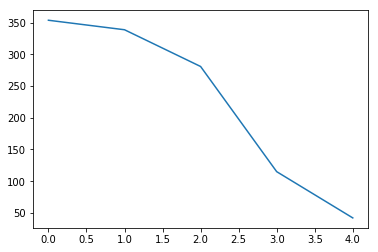

Real Percentage of gain: -102.79625018552123
Percentage of gain: -0.2406565504138325
Total gain: -272.4232150684584
000000000000000000000000000000000000000000000000
Percentile:  0
[[116   0]
 [238   0]]
0.327683615819209
Percentile:  1
[[114   0]
 [227   1]]
0.3362573099415205
Percentile:  2
[[127   0]
 [150   1]]
0.460431654676259
Percentile:  3
[[63  0]
 [51  0]]
0.5526315789473685
Percentile:  4
[[28  0]
 [14  0]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... CSCO
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.4704724409448819
G-score: 0.518730614503491
Accuracy 0.5217777777777778
Window: 140
[[348 129]
 [409 239]]
Vol pos 2.2810950186750976
Vol neg 1.3621063944397076


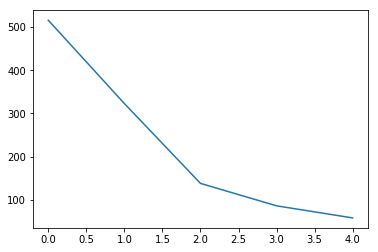

Real Percentage of gain: 14.508047277756802
Percentage of gain: 0.5388351428921954
Total gain: 606.1895357537197
000000000000000000000000000000000000000000000000
Percentile:  0
[[163  57]
 [204  92]]
0.4941860465116279
Percentile:  1
[[ 37  59]
 [165  62]]
0.3065015479876161
Percentile:  2
[[38 12]
 [35 53]]
0.6594202898550725
Percentile:  3
[[57  1]
 [ 0 28]]
0.9883720930232558
Percentile:  4
[[52  0]
 [ 3  3]]
0.9482758620689655
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.6462540716612377
G-score: 0.37986088808180063
Accuracy 0.5203180212014135
Window: 140
[[ 93 447]
 [ 96 496]]
Vol pos 2.952373755535109
Vol neg 2.7534327628116113


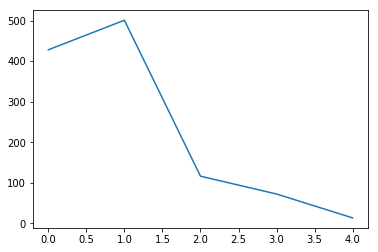

Real Percentage of gain: 146.94496380459267
Percentage of gain: 0.21540119417268022
Total gain: 243.834151803474
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 15 212]
 [ 14 187]]
0.4719626168224299
Percentile:  1
[[ 35 162]
 [ 68 236]]
0.5409181636726547
Percentile:  2
[[ 6 36]
 [ 8 66]]
0.6206896551724138
Percentile:  3
[[26 34]
 [ 6  6]]
0.4444444444444444
Percentile:  4
[[10  3]
 [ 0  0]]
0.7692307692307693
000000000000000000000000000000000000000000000000
Working on... NVDA
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.5174825174825175
G-score: 0.5687570454574891
Accuracy 0.573321554770318
Window: 140
[[390  86]
 [397 259]]
Vol pos 4.09204630758127
Vol neg 3.3367127459353583


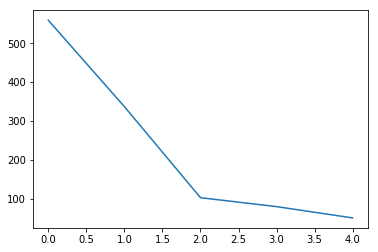

Real Percentage of gain: 94.71344428633304
Percentage of gain: 0.922354944640871
Total gain: 1044.105797333466
000000000000000000000000000000000000000000000000
Percentile:  0
[[260  53]
 [189  57]]
0.5670840787119857
Percentile:  1
[[109   8]
 [145  75]]
0.5459940652818991
Percentile:  2
[[13 18]
 [41 31]]
0.42718446601941745
Percentile:  3
[[ 8  7]
 [ 9 56]]
0.8
Percentile:  4
[[ 0  0]
 [12 39]]
0.7647058823529411
000000000000000000000000000000000000000000000000
Working on... NFLX
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.15148188803512627
G-score: 0.2840547669503724
Accuracy 0.31713780918727913
Window: 140
[[290   7]
 [766  69]]
Vol pos 3.617250691306116
Vol neg 4.670779425079522


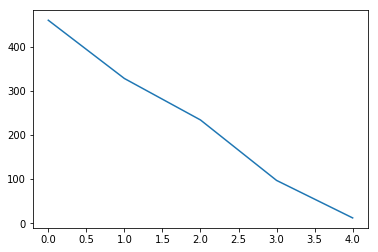

Real Percentage of gain: -322.5377827819287
Percentage of gain: -2.042331711490791
Total gain: -2311.9194974075754
000000000000000000000000000000000000000000000000
Percentile:  0
[[164   6]
 [277  13]]
0.3847826086956522
Percentile:  1
[[ 59   1]
 [227  41]]
0.3048780487804878
Percentile:  2
[[ 38   0]
 [185  10]]
0.20600858369098712
Percentile:  3
[[27  0]
 [65  5]]
0.32989690721649484
Percentile:  4
[[ 1  0]
 [11  0]]
0.08333333333333333
000000000000000000000000000000000000000000000000
Working on... BKNG
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.8537074148296594
G-score: 0.8258620969053474
Accuracy 0.8165829145728644
Window: 140
[[112  19]
 [ 54 213]]
Vol pos 1.3451002746340173
Vol neg 0.4504563328085042


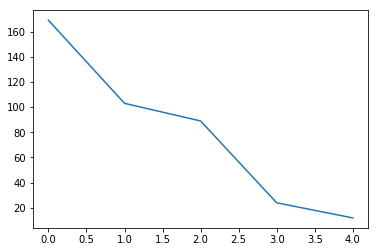

Real Percentage of gain: 254.3726055942512
Percentage of gain: 1.0157645149774743
Total gain: 404.2742769610348
000000000000000000000000000000000000000000000000
Percentile:  0
[[79 18]
 [41 34]]
0.6569767441860465
Percentile:  1
[[25  1]
 [13 61]]
0.86
Percentile:  2
[[ 7  0]
 [ 0 82]]
1.0
Percentile:  3
[[23]]
1.0
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.4113614103819785
G-score: 0.48194584514686517
Accuracy 0.46767050487156775
Window: 140
[[318  70]
 [531 210]]
Vol pos 2.8305852040937025
Vol neg 2.4038020864744674


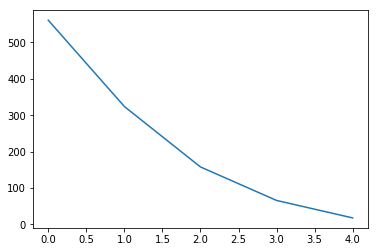

Real Percentage of gain: -160.4264018888055
Percentage of gain: 0.044166460398866306
Total gain: 49.86393379032006
000000000000000000000000000000000000000000000000
Percentile:  0
[[207  70]
 [232  52]]
0.46167557932263814
Percentile:  1
[[ 63   0]
 [195  66]]
0.39814814814814814
Percentile:  2
[[25  0]
 [86 47]]
0.45569620253164556
Percentile:  3
[[23  0]
 [17 26]]
0.7424242424242424
Percentile:  4
[[18]]
1.0
000000000000000000000000000000000000000000000000
Working on... AMGN
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.7176545570427024
G-score: 0.5063075067656245
Accuracy 0.6055209260908282
Window: 140
[[117 203]
 [240 563]]
Vol pos 2.1905096471541947
Vol neg 1.533280125297873


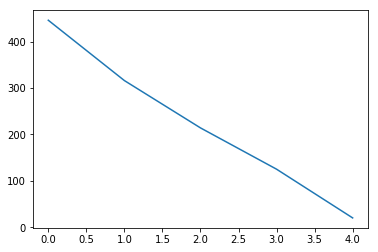

Real Percentage of gain: 169.75414876160818
Percentage of gain: 0.7215525062848572
Total gain: 810.3034645578947
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 24 141]
 [ 93 188]]
0.47533632286995514
Percentile:  1
[[ 26  29]
 [ 86 175]]
0.6360759493670886
Percentile:  2
[[ 13  13]
 [ 49 139]]
0.7102803738317757
Percentile:  3
[[39 17]
 [12 57]]
0.768
Percentile:  4
[[14  3]
 [ 0  3]]
0.85
000000000000000000000000000000000000000000000000
Working on... TXN
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.760059612518629
G-score: 0.7369440281699201
Accuracy 0.7152961980548187
Window: 140
[[299  69]
 [253 510]]
Vol pos 2.6032193723860995
Vol neg 2.226072766151719


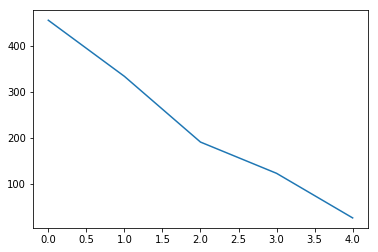

Real Percentage of gain: 177.10906692076531
Percentage of gain: 1.2283015398404074
Total gain: 1389.2090415595007
000000000000000000000000000000000000000000000000
Percentile:  0
[[144  64]
 [101 146]]
0.6373626373626373
Percentile:  1
[[124   5]
 [ 52 153]]
0.8293413173652695
Percentile:  2
[[ 14   0]
 [ 58 120]]
0.6979166666666666
Percentile:  3
[[10  0]
 [39 73]]
0.680327868852459
Percentile:  4
[[ 7  0]
 [ 2 17]]
0.9230769230769231
000000000000000000000000000000000000000000000000
Working on... AVGO
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.6773455377574371
G-score: 0.6279824544240353
Accuracy 0.6246672582076309
Window: 140
[[260 146]
 [277 444]]
Vol pos 3.568605225547219
Vol neg 2.591666815268364


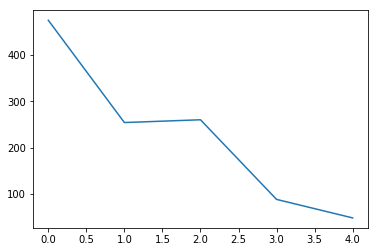

Real Percentage of gain: 116.08744324346046
Percentage of gain: 1.256453430281033
Total gain: 1416.0230159267242
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 85 116]
 [112 162]]
0.52
Percentile:  1
[[76 28]
 [54 96]]
0.6771653543307087
Percentile:  2
[[ 36   2]
 [ 84 138]]
0.6692307692307692
Percentile:  3
[[25  0]
 [27 36]]
0.6931818181818182
Percentile:  4
[[37  0]
 [ 0 11]]
1.0
000000000000000000000000000000000000000000000000
Working on... PYPL
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.6192821956368755
G-score: 0.5024966940328845
Accuracy 0.520814880425155
Window: 140
[[148 170]
 [371 440]]
Vol pos 3.190009208672547
Vol neg 2.605440400531714


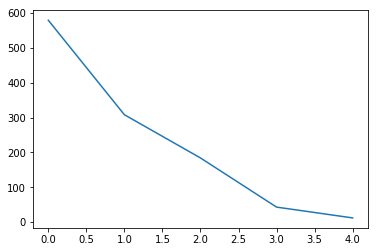

Real Percentage of gain: 31.79282882143835
Percentage of gain: 0.4129159946960144
Total gain: 466.1821580118003
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 51  83]
 [206 239]]
0.5008635578583766
Percentile:  1
[[ 31  20]
 [146 111]]
0.461038961038961
Percentile:  2
[[61 59]
 [19 45]]
0.5760869565217391
Percentile:  3
[[ 5  8]
 [ 0 30]]
0.813953488372093
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... GILD
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.657124268054652
G-score: 0.3905921330721914
Accuracy 0.5328014184397163
Window: 140
[[ 96 486]
 [ 41 505]]
Vol pos 2.7852549883245263
Vol neg 3.7561875621156027


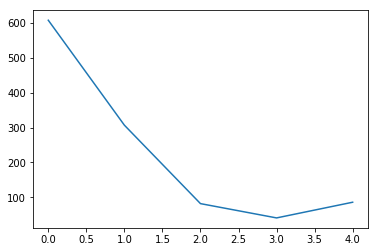

Real Percentage of gain: -255.9649990384352
Percentage of gain: -0.2708976925991863
Total gain: -305.57259725188214
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 34 305]
 [ 19 250]]
0.46710526315789475
Percentile:  1
[[ 54  49]
 [ 22 182]]
0.7687296416938111
Percentile:  2
[[ 2 10]
 [ 0 70]]
0.8780487804878049
Percentile:  3
[[ 2 39]
 [ 0  0]]
0.04878048780487805
Percentile:  4
[[ 4 82]
 [ 0  0]]
0.046511627906976744
000000000000000000000000000000000000000000000000
Working on... COST
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.11655011655011654
G-score: 0.23629146031205514
Accuracy 0.32741792369121564
Window: 140
[[319  66]
 [692  50]]
Vol pos 0.9850833003719388
Vol neg 1.583733484800021


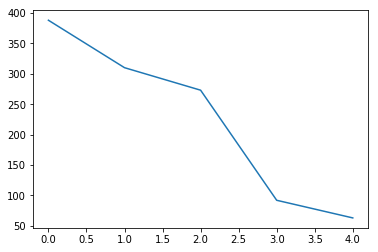

Real Percentage of gain: -220.37159283143188
Percentage of gain: -0.7426568266558745
Total gain: -836.9742436411706
000000000000000000000000000000000000000000000000
Percentile:  0
[[171  29]
 [173  14]]
0.4780361757105943
Percentile:  1
[[ 82  22]
 [186  20]]
0.32903225806451614
Percentile:  2
[[ 59   9]
 [195  10]]
0.25274725274725274
Percentile:  3
[[ 6  6]
 [74  6]]
0.13043478260869565
Percentile:  4
[[ 0  0]
 [63  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... QCOM
11.725006748852696
0.0
Diff in tren train and test
0.47791519434628976
0.6861184792219275
F1,score 0.5456110154905335
G-score: 0.57367722736942
Accuracy 0.53315649867374
Window: 140
[[286  69]
 [459 317]]
Vol pos 3.798831039109661
Vol neg 2.8412200930302207


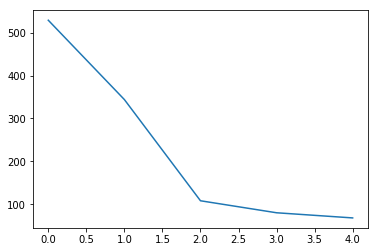

Real Percentage of gain: 64.50895006016844
Percentage of gain: 0.6989663195960824
Total gain: 790.5309074631691
000000000000000000000000000000000000000000000000
Percentile:  0
[[189  41]
 [206  93]]
0.5330812854442344
Percentile:  1
[[ 34  14]
 [186 110]]
0.4186046511627907
Percentile:  2
[[ 4 14]
 [44 46]]
0.46296296296296297
Percentile:  3
[[12  0]
 [23 45]]
0.7125
Percentile:  4
[[46  0]
 [ 0 22]]
1.0
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.49136203772055387
Mean gain over portfolio :  62.84305834107447
Real mean gain over portfolio -24.261039233432236


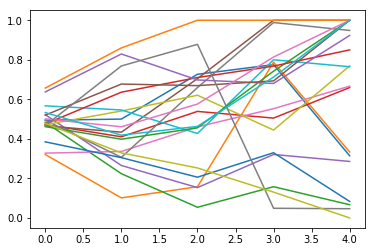

In [9]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    
    
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        y=np.array(y)
        
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        
        x_tv,y_tv=smote(x_tv,y_tv)
        rf = RandomForestClassifier()
        rf.fit(x_tv, y_tv)
        prediction=rf.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rf.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rf.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rf.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rf.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

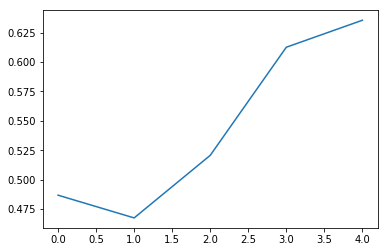

In [10]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()